# importing modules

In [322]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error
%matplotlib inline

# reading dataset

In [323]:
train_data = pd.read_csv('IEEE_train_data.csv')
test_data = pd.read_csv('IEEE_test_data.csv')

In [324]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 17 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   id                                      591239 non-null  int64  
 1   timestamp                               591239 non-null  object 
 2   active_power_calculated_by_converter    591229 non-null  float64
 3   active_power_raw                        591222 non-null  float64
 4   ambient_temperature                     581442 non-null  float64
 5   generator_speed                         274403 non-null  float64
 6   generator_winding_temp_max              591238 non-null  float64
 7   grid_power10min_average                 591204 non-null  float64
 8   nc1_inside_temp                         591007 non-null  float64
 9   nacelle_temp                            591021 non-null  float64
 10  reactice_power_calculated_by_converter  5912

In [325]:
train_data.isnull().sum()

id                                             0
timestamp                                      0
active_power_calculated_by_converter          10
active_power_raw                              17
ambient_temperature                         9797
generator_speed                           316836
generator_winding_temp_max                     1
grid_power10min_average                       35
nc1_inside_temp                              232
nacelle_temp                                 218
reactice_power_calculated_by_converter         4
reactive_power                                 2
wind_direction_raw                             7
wind_speed_raw                                 1
wind_speed_turbulence                         15
turbine_id                                     4
Target                                         0
dtype: int64

In [326]:
def plot_nans(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.show()
    else:
        print('No NAs found')

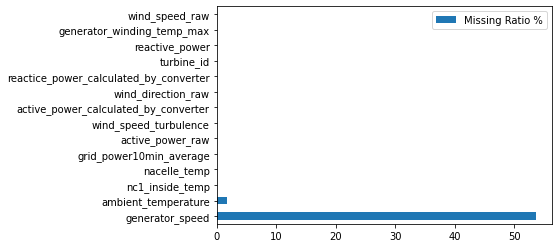

In [327]:
plot_nans(train_data)

##### from last cell we saw that 'id' is unique for all rows so we must detele this column and generaor_speed has alot of nans so i will delete it

In [328]:
train_data.drop(columns=['id'],inplace=True)

# handling features

#### handling generator_speed colulmn

In [329]:
generator_speed = train_data['generator_speed'].ffill()
generator_speed.fillna(value=generator_speed.median(),inplace=True)

In [330]:
generator_speed.isnull().sum()

0

In [331]:
train_data['generator_speed'] = generator_speed

In [332]:
train_data.isnull().sum()

timestamp                                    0
active_power_calculated_by_converter        10
active_power_raw                            17
ambient_temperature                       9797
generator_speed                              0
generator_winding_temp_max                   1
grid_power10min_average                     35
nc1_inside_temp                            232
nacelle_temp                               218
reactice_power_calculated_by_converter       4
reactive_power                               2
wind_direction_raw                           7
wind_speed_raw                               1
wind_speed_turbulence                       15
turbine_id                                   4
Target                                       0
dtype: int64

### handling ambient_temperature column

In [333]:
train_data['ambient_temperature'] = train_data['ambient_temperature'].ffill().fillna(value=train_data['ambient_temperature'].median())

In [334]:
train_data.isnull().sum()

timestamp                                   0
active_power_calculated_by_converter       10
active_power_raw                           17
ambient_temperature                         0
generator_speed                             0
generator_winding_temp_max                  1
grid_power10min_average                    35
nc1_inside_temp                           232
nacelle_temp                              218
reactice_power_calculated_by_converter      4
reactive_power                              2
wind_direction_raw                          7
wind_speed_raw                              1
wind_speed_turbulence                      15
turbine_id                                  4
Target                                      0
dtype: int64

### splitting data into categorical data and numerical data

In [335]:
cat_train_data=train_data.select_dtypes(include='object')
num_train_data=train_data.select_dtypes(exclude='object')


##### handling missing values in cat_data

In [336]:
cat_train_data.isnull().sum()

timestamp     0
turbine_id    4
dtype: int64

In [337]:
cat_train_data['turbine_id']=cat_train_data['turbine_id'].fillna(value=cat_train_data['turbine_id'].mode()[0])

In [338]:
cat_train_data.isnull().sum()

timestamp     0
turbine_id    0
dtype: int64

##### handling missing values in num_data

In [339]:
num_train_data.isnull().sum()

active_power_calculated_by_converter       10
active_power_raw                           17
ambient_temperature                         0
generator_speed                             0
generator_winding_temp_max                  1
grid_power10min_average                    35
nc1_inside_temp                           232
nacelle_temp                              218
reactice_power_calculated_by_converter      4
reactive_power                              2
wind_direction_raw                          7
wind_speed_raw                              1
wind_speed_turbulence                      15
Target                                      0
dtype: int64

In [340]:
num_train_data.fillna(num_train_data.mean(),inplace=True)

In [341]:
num_train_data.isnull().sum()

active_power_calculated_by_converter      0
active_power_raw                          0
ambient_temperature                       0
generator_speed                           0
generator_winding_temp_max                0
grid_power10min_average                   0
nc1_inside_temp                           0
nacelle_temp                              0
reactice_power_calculated_by_converter    0
reactive_power                            0
wind_direction_raw                        0
wind_speed_raw                            0
wind_speed_turbulence                     0
Target                                    0
dtype: int64

#### preparing cat_data

In [342]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
cat_train_data.turbine_id=lb.fit_transform(cat_train_data.turbine_id)
cat_train_data.timestamp = pd.to_datetime(cat_train_data.timestamp).astype(np.int64)

In [343]:
cat_train_data

,timestamp,turbine_id
0,1624367700000000000,0
1,1636220400000000000,15
2,1640293680000000000,11
3,1609603260000000000,14
4,1638812760000000000,14
...,...,...
591234,1616096220000000000,15
591235,1627102440000000000,10
591236,1636465860000000000,9
591237,1612234680000000000,14


In [344]:
cat_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   timestamp   591239 non-null  int64
 1   turbine_id  591239 non-null  int32
dtypes: int32(1), int64(1)
memory usage: 6.8 MB


In [345]:
num_train_data = num_train_data.join(cat_train_data)

#### all train_data now are numerical and ready for model training

In [346]:
num_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591239 entries, 0 to 591238
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   active_power_calculated_by_converter    591239 non-null  float64
 1   active_power_raw                        591239 non-null  float64
 2   ambient_temperature                     591239 non-null  float64
 3   generator_speed                         591239 non-null  float64
 4   generator_winding_temp_max              591239 non-null  float64
 5   grid_power10min_average                 591239 non-null  float64
 6   nc1_inside_temp                         591239 non-null  float64
 7   nacelle_temp                            591239 non-null  float64
 8   reactice_power_calculated_by_converter  591239 non-null  float64
 9   reactive_power                          591239 non-null  float64
 10  wind_direction_raw                      5912

In [347]:
columns = num_train_data.columns
sc = StandardScaler()
for column in num_train_data.columns:
    if column != 'Target':
        num_train_data[column] = sc.fit_transform(np.array(num_train_data[column]).reshape(-1, 1))

In [348]:
num_train_data

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,Target,timestamp,turbine_id
0,-0.983035,-0.991513,1.269174,0.027940,0.420207,-0.762194,0.020301,1.118834,-1.185711,-1.199785,1.121732,-0.948901,-0.402524,48.670906,-0.115268,-1.643617
1,-0.563519,-0.589509,0.973610,-0.746331,-0.359924,-0.642440,0.284098,0.345725,-0.340152,-0.339886,-1.234919,-0.351614,-1.070905,47.779032,1.206899,1.624557
2,-0.612787,-0.623364,0.964604,-0.746331,-1.353153,-0.730011,0.328240,-0.552762,-1.164833,-1.044371,0.981553,-0.227920,-0.894746,45.542946,1.661272,0.753044
3,-1.001012,-1.035717,0.964604,-0.746331,-2.765517,-1.084420,0.508725,-0.325088,-0.217043,-0.407990,-1.017396,-0.971713,-0.066006,47.515691,-1.762239,1.406678
4,-0.585497,-0.613920,0.911965,-0.746331,0.436728,-0.637237,0.204573,0.288005,-0.225881,-0.335942,-0.561701,-0.580014,-0.976028,44.625755,1.496076,1.406678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591234,-0.852060,-0.888909,0.404368,0.716456,-0.030877,-0.949815,-0.854118,0.172357,-0.305264,-0.398388,0.735475,-0.996752,-0.944310,49.511423,-1.037951,1.624557
591235,0.323291,0.335881,0.061229,0.716456,-0.137846,0.173566,0.736315,0.274324,-0.784632,-0.654127,0.597686,0.325471,-0.097855,46.682127,0.189791,0.535165
591236,-0.496868,-0.522455,0.799866,-0.578557,0.042350,-0.021478,2.438887,1.586380,-0.329610,-0.296179,-1.570604,-0.640325,1.577289,49.314674,1.234280,0.317287
591237,-1.047799,-1.087340,0.929753,-0.578557,-1.358953,-1.097495,0.288011,-0.415709,-0.237887,-0.415939,-0.147626,-1.168250,-1.178546,51.652792,-1.468705,1.406678


c:\Users\gno\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

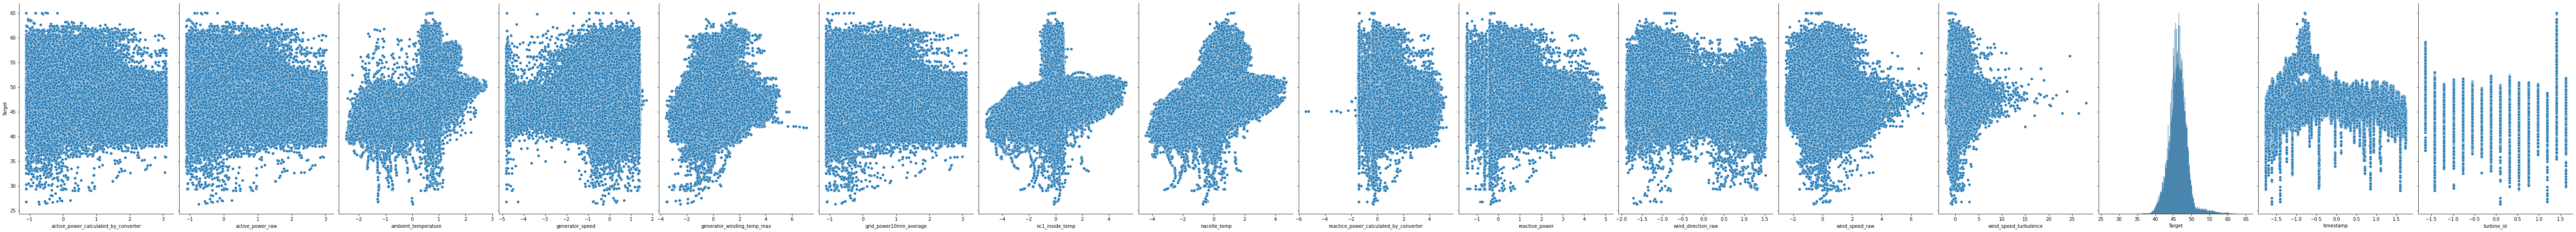

In [349]:
plt.figure(figsize=(20,20))
sns.pairplot(num_train_data, x_vars=num_train_data.columns, y_vars='Target', size=7, aspect=0.7)

In [350]:
X = num_train_data.drop(columns=['Target'])
y = num_train_data['Target']

In [351]:
high_corr_cols = []
for column in X.columns:
    corr = X[column].corr(y)
    print(f'{column} corrolation: {corr}')
    if corr >= 0.4 or corr <= -0.4:
        high_corr_cols.append(column)
print(high_corr_cols)

active_power_calculated_by_converter corrolation: -0.041472307741325216
active_power_raw corrolation: -0.04081095258864737
ambient_temperature corrolation: 0.41264355591967516
generator_speed corrolation: -0.021821219336562916
generator_winding_temp_max corrolation: 0.29529496017303186
grid_power10min_average corrolation: -0.04964532077949022
nc1_inside_temp corrolation: 0.20116536160169446
nacelle_temp corrolation: 0.5086661999223643
reactice_power_calculated_by_converter corrolation: -0.033921992257437035
reactive_power corrolation: -0.03549161971822334
wind_direction_raw corrolation: 0.06945427906440468
wind_speed_raw corrolation: -0.06797440620007318
wind_speed_turbulence corrolation: 0.09638186850073874
timestamp corrolation: -0.06951865381441766
turbine_id corrolation: -0.13874350592750473
['ambient_temperature', 'nacelle_temp']


In [352]:
from sklearn.model_selection import train_test_split

In [353]:
X,X_test,y,y_test=train_test_split(X,y,train_size=0.8)

## handling outliars

In [354]:
X = X.join(y)

In [355]:
for column in X.columns:
    if column != 'Target':
        Q1 = X[column].quantile(0.25)
        Q3  = X[column].quantile(0.75)
        IQR = Q3-Q1
        X = X[(X[column] < Q3+(1.5*IQR)) & (X[column] > Q1-(1.5*IQR))]

In [356]:
y = X['Target']
X = X.drop(columns=['Target'])

<AxesSubplot:>

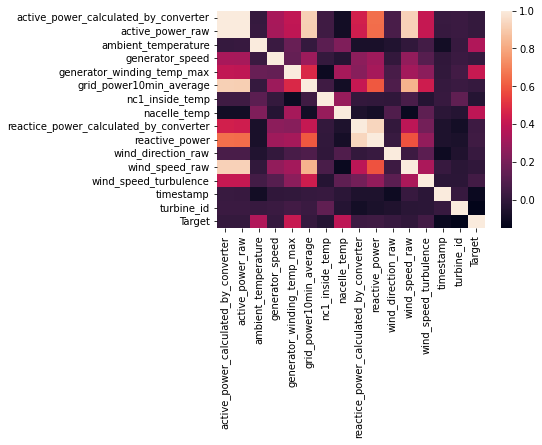

In [357]:
sns.heatmap(data=X.join(y).corr())

In [358]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=0.8)

In [359]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,median_absolute_error

## linear regression

In [360]:
lr = Ridge(alpha=0.00001)
lr.fit(X_train,y_train)
hx = lr.predict(X_val)

print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = lr.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')



mean_absolute_error on val_data :1.3399479849776454
mean_squared_error on val_data :3.738765889977131
median_absolute_error on val_data :0.9795246843459395
_________________________________________________________
mean_absolute_error on test_data :1.4997806724927178
mean_squared_error on test_data :4.322317533204343
median_absolute_error on test_data :1.1296996078440102


## DecisionTree

In [361]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
hx = dt.predict(X_val)

print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = dt.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


mean_absolute_error on val_data :0.574830006572763
mean_squared_error on val_data :1.0107531548846251
median_absolute_error on val_data :0.2756843500000059
_________________________________________________________
mean_absolute_error on test_data :0.8590391305640687
mean_squared_error on test_data :2.1212367546465547
median_absolute_error on test_data :0.48486042499999726


## RandomForestRegressor 

In [362]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100,max_depth=10)
rf.fit(X_train,y_train)

hx = rf.predict(X_val)
print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = rf.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


### support vector regressor

In [ ]:
from sklearn.svm import LinearSVR
ls = LinearSVR()
ls.fit(X_train,y_train)

hx = ls.predict(X_val)
print(f'mean_absolute_error on val_data :{mean_absolute_error(y_val,hx)}')
print(f'mean_squared_error on val_data :{mean_squared_error(y_val,hx)}')
print(f'median_absolute_error on val_data :{median_absolute_error(y_val,hx)}')
print('_________________________________________________________')

hx = ls.predict(X_test)
print(f'mean_absolute_error on test_data :{mean_absolute_error(y_test,hx)}')
print(f'mean_squared_error on test_data :{mean_squared_error(y_test,hx)}')
print(f'median_absolute_error on test_data :{median_absolute_error(y_test,hx)}')


mean_absolute_error on val_data :1.4769279459702704
mean_squared_error on val_data :4.657948856607247
median_absolute_error on val_data :1.0606385314787339
_________________________________________________________
mean_absolute_error on test_data :1.5023911377056673
mean_squared_error on test_data :4.701930533286307
median_absolute_error on test_data :1.0848912087609968
